# Explorative Analysis of Properties in Nigeria

I import the necessary libraries for the analysis

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Data Scrapping

I scrape the data containing nature of the property, type of property, date posted, date updated, address of property, number of beds, baths and toilets.
N.B. Property in this case include lands and houses.

In [ ]:
property_ng = {}
property_no = 0

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36",}

for page in range(0,25):
    url = "https://www.propertypro.ng/property-for-sale?search=&auto=&type=&bedroom=&min_price=&max_price={page}".format(page=page)
    response = requests.get(url, headers=headers)
    data = response.text
    soup = BeautifulSoup(data, 'html.parser')
    properties = soup.find_all('div',{'class':'single-room-sale listings-property'})
    for prop in properties:

        date_posted = prop.find('h5', class_=False, id=False).text.replace(',', ' ')
        date_updated = date_posted.split()[1:4]
        nature_of_property = prop.find('h4', {'class':"listings-property-title"}).text
        type_of_property = prop.find('h3', {'class':"listings-property-title2"}).text
        address_of_property = prop.find('h4', class_=False, id=False).text
        no_Beds_Baths_Toilets = prop.find('div', {'class':"fur-areea"})
        no_of_beds_baths_toilets = no_Beds_Baths_Toilets.text.replace('\n',' ') if no_Beds_Baths_Toilets else "Not Available"

        property_no+=1
        property_ng[property_no] = [date_posted,date_updated,nature_of_property,type_of_property,address_of_property,no_of_beds_baths_toilets]
    #print('Total properties:', property_no)
    property_df1 = pd.DataFrame.from_dict(property_ng, orient = 'index', columns = ['Date_posted','Date_updated','Nature_of_property','Type_of_property','Property_Location','No_of_beds_baths_toilets'])

In [ ]:
# Getting the top rows of the data
property_df1.head()

In [ ]:
# Saving to CSV
property_df1.to_csv('Property_data.csv')

# Reading the property data

In [2]:
property_df1 = pd.read_csv('Property_data.csv')

print(property_df1.head())

   Unnamed: 0                                Date_posted  \
0           1    Updated 28 Aug 2022  Added 17 May 2022    
1           2    Updated 29 Aug 2022  Added 05 Aug 2022    
2           3    Updated 22 Aug 2022  Added 11 Apr 2022    
3           4    Updated 28 Jul 2022  Added 09 Nov 2021    
4           5    Updated 28 Jul 2022  Added 14 Jan 2022    

            Date_updated        Nature_of_property  \
0  ['28', 'Aug', '2022']  4 BEDROOM HOUSE FOR SALE   
1  ['29', 'Aug', '2022']             LAND FOR SALE   
2  ['22', 'Aug', '2022']             LAND FOR SALE   
3  ['28', 'Jul', '2022']             LAND FOR SALE   
4  ['28', 'Jul', '2022']             LAND FOR SALE   

                          Type_of_property  \
0  Spacious 4 Bedroom Semi Detached Duplex   
1                      2400sqm Land For Jv   
2    Joint Venture Land Measuring 21 Plots   
3                   Land For Sale In Lekki   
4                8000 Sqm Of Joint Venture   

                                   Pr

In [3]:
property_df1.columns

Index(['Unnamed: 0', 'Date_posted', 'Date_updated', 'Nature_of_property',
       'Type_of_property', 'Property_Location', 'No_of_beds_baths_toilets'],
      dtype='object')

# Data Cleaning

1. Dropping redundant column(s)
2. Column Separation
3. Identifying and removing the null values

I shall drop some columns that are not essential to our analysis

In [4]:
property_df2 = property_df1.drop(columns=['Date_updated','Unnamed: 0'])

# Confirming deletion of the columns

property_df2.columns

Index(['Date_posted', 'Nature_of_property', 'Type_of_property',
       'Property_Location', 'No_of_beds_baths_toilets'],
      dtype='object')

I shall separate the columns below:
1. 'Date_posted' into 'Date added' and 'Date updated'
2. 'No_of_beds_baths_toilets' into 'No_of_beds', 'No_of_baths' and 'No_of_toilets'

# 1.

In [5]:
# I removed the values that have 'added' behind them, assigning them to a new column 'Date_updated'
property_df2['Date_updated'] = property_df2['Date_posted'].apply(lambda row:row[:row.find('Added')])

# I remove the string 'Updated' in the new column
property_df2['Date_updated'] = property_df2['Date_updated'].str.strip('Updated ')

In [6]:
# I create a new list 'Date_added' to put it the values

Date_added = []

for i in property_df2['Date_posted']:
    if 'Added' in i:
        ans = i.split('Added')[1]
    else:
        answer = i
    Date_added.append(ans)
    
# I convert the list into a new column 'Date_added' in the data

property_df2['Date_added'] = Date_added

In [7]:
# Confirming the inclusion of the new columns in the data
property_df2.columns

Index(['Date_posted', 'Nature_of_property', 'Type_of_property',
       'Property_Location', 'No_of_beds_baths_toilets', 'Date_updated',
       'Date_added'],
      dtype='object')

Since the column 'Date_posted' won't be needed again, I simply drop it.

In [8]:
property_df2 = property_df2.drop(columns='Date_posted')

property_df2

,Nature_of_property,Type_of_property,Property_Location,No_of_beds_baths_toilets,Date_updated,Date_added
0,4 BEDROOM HOUSE FOR SALE,Spacious 4 Bedroom Semi Detached Duplex,Second Tollgate Lekki Lagos,4 beds 4 baths 5 Toilets,28 Aug 2022,17 May 2022
1,LAND FOR SALE,2400sqm Land For Jv,Ikate Lekki Lagos,0 beds 0 baths 0 Toilets,29 Aug 2022,05 Aug 2022
2,LAND FOR SALE,Joint Venture Land Measuring 21 Plots,"Chevron Cooperative Estate, Alpha Beach New Ro...",beds baths Toilets,22 Aug 2022,11 Apr 2022
3,LAND FOR SALE,Land For Sale In Lekki,Lekki Lagos,0 beds 0 baths 0 Toilets,28 Jul 2022,09 Nov 2021
4,LAND FOR SALE,8000 Sqm Of Joint Venture,Lekki Phase 1 Lekki Lagos,0 beds 0 baths 0 Toilets,28 Jul 2022,14 Jan 2022
...,...,...,...,...,...,...
481,LAND FOR SALE,Land,Caritas Luxury Homes Okun Iseki Ibeju Lekki Fr...,0 beds 0 baths 0 Toilets,11 Apr 2022,30 Jan 2022
482,LAND FOR SALE,Land,Ibeju Lekki Lagos,0 beds 0 baths 0 Toilets,,09 Mar 2022
483,6 BEDROOM HOUSE FOR SALE,6 Bedroom Fully Detached,Banana Island Ikoyi Lagos,6 beds 7 baths 6 Toilets,,07 Mar 2022
484,LAND FOR SALE,Land,Epe Lagos,0 beds 0 baths 0 Toilets,,24 Feb 2022


# 2.

In [9]:
# I create a new list 'No_of_beds' to put in the values

No_of_beds = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'beds' in i:
        ans = i.split('beds')[0]
    else:
        ans = i
    No_of_beds.append(ans)
    
# I convert the list into a new column 'No_of_beds' in the data

property_df2['No_of_beds'] = No_of_beds

In [10]:
# I create a new list 'No_of_baths' to put in the values

No_of_baths = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'baths' in i:
        ans = i.split('baths')[0]
    else:
        ans = i
    No_of_baths.append(ans)
    
# Since the result above still contains the string 'beds' and its values, i have to remove them

No_of_bath = []
for i in No_of_baths:
    if 'beds' in i:
        ans = i.split('beds')[1]
    else:
        ans = i
    No_of_bath.append(ans)
    
# I convert the list into a new column 'No_of_baths' in the data

property_df2['No_of_baths'] = No_of_bath

In [11]:
# I create a new list 'No_of_toilets' to put in the values

No_of_toilets = []
for i in property_df2['No_of_beds_baths_toilets']:
    if 'Toilets' in i:
        ans = i.split('Toilets')[0]
    else:
        ans = i
    No_of_toilets.append(ans)
    
# Since the result above still contains the string 'beds', 'baths' and their values, i have to remove them

No_of_toilet = []
for i in No_of_toilets:
    if 'beds' in i:
        ans = i.split('beds')[1]
    else:
        ans = i
    No_of_toilet.append(ans)
    
No_of_Toilet = []
for i in No_of_toilet:
    if 'baths' in i:
        ans = i.split('baths')[1]
    else:
        ans = i
    No_of_Toilet.append(ans)
    
# I convert the list into a new column 'No_of_toilets' in the data

property_df2['No_of_toilets'] = No_of_Toilet

In [12]:
# I delete the column 'No_of_beds_baths_toilets' in the data

property_df3 = property_df2.drop(columns=['No_of_beds_baths_toilets'])

# 3.

In [13]:
# Identifying null values in the dataset

property_df3.isnull().sum()

Nature_of_property    0
Type_of_property      0
Property_Location     0
Date_updated          0
Date_added            0
No_of_beds            0
No_of_baths           0
No_of_toilets         0
dtype: int64

In [14]:
# Collecting necessary info about each column of the data

property_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Nature_of_property  486 non-null    object
 1   Type_of_property    486 non-null    object
 2   Property_Location   486 non-null    object
 3   Date_updated        486 non-null    object
 4   Date_added          486 non-null    object
 5   No_of_beds          486 non-null    object
 6   No_of_baths         486 non-null    object
 7   No_of_toilets       486 non-null    object
dtypes: object(8)
memory usage: 30.5+ KB


# Data Analysis

In [15]:
# Checking duplicate values

property_df3.duplicated().sum()

# Drop duplicate values

property_df4 = property_df3.drop_duplicates()

In [16]:
# Describing the data

property_df4.describe()

,Nature_of_property,Type_of_property,Property_Location,Date_updated,Date_added,No_of_beds,No_of_baths,No_of_toilets
count,31,31,31,31,31,31,31,31
unique,7,20,25,12,28,6,6,6
top,LAND FOR SALE,Land,Ibeju Lekki Lagos,,03 Feb 2022,0,0,0
freq,24,11,3,12,3,22,22,22


In [17]:
# Identifying unique values in each column of the data

property_df4.nunique()

Nature_of_property     7
Type_of_property      20
Property_Location     25
Date_updated          12
Date_added            28
No_of_beds             6
No_of_baths            6
No_of_toilets          6
dtype: int64

In [ ]:
# Since I indentified the columns 'No_of_beds','No_of_baths' and 'No_of_toilets' are object type, 
# I decide to change them to int type 

convert_dict = {
    'No_of_beds':int,
    'No_of_baths':int,
    'No_of_toilets':int
    }

property_df4[['No_of_beds','No_of_baths','No_of_toilets']] = property_df4[['No_of_beds','No_of_baths','No_of_toilets']].astype(convert_dict)

# I tried the format above, I got an error.

In [ ]:
# I tried another format below, still same error.

property_df2['No_of_beds'] = property_df2['No_of_beds'].astype('int64')

Since I tried the various methods of conversion, it was resulting to errors. I decided to coerce the errors.

In [18]:
property_df4['No_of_beds'] = pd.to_numeric(property_df4['No_of_beds'], errors='coerce')
property_df4['No_of_baths'] = pd.to_numeric(property_df4['No_of_baths'], errors='coerce')
property_df4['No_of_toilets'] = pd.to_numeric(property_df4['No_of_toilets'], errors='coerce')

C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\3124514937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['No_of_beds'] = pd.to_numeric(property_df4['No_of_beds'], errors='coerce')
C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\3124514937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['No_of_baths'] = pd.to_numeric(property_df4['No_of_baths'], errors='coerce')
C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\3124514937.py:3: Setti

In [19]:
# Confirming the changed datatypes of the columns

property_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 485
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nature_of_property  31 non-null     object 
 1   Type_of_property    31 non-null     object 
 2   Property_Location   31 non-null     object 
 3   Date_updated        31 non-null     object 
 4   Date_added          31 non-null     object 
 5   No_of_beds          27 non-null     float64
 6   No_of_baths         27 non-null     float64
 7   No_of_toilets       27 non-null     float64
dtypes: float64(3), object(5)
memory usage: 2.2+ KB


# Data Visualization

I import python libraries for visualizng the data

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

## How many properties were added?

To answer the question, I plotted the count of the properties against the date added.

Before that, I changed the data type of the columns 'Date_added' and 'Date_updated' into datetime.

In [21]:
property_df4['Date_added'] = pd.to_datetime(property_df4['Date_added'], errors='coerce')

property_df4['Date_updated'] = pd.to_datetime(property_df4['Date_updated'], errors='coerce')

C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\1865038769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['Date_added'] = pd.to_datetime(property_df4['Date_added'], errors='coerce')
C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\1865038769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['Date_updated'] = pd.to_datetime(property_df4['Date_updated'], errors='coerce')


In [22]:
Date_property_added = property_df4.groupby(['Nature_of_property'])['Date_added'].count()

Date_property_added

Nature_of_property
10 BEDROOM COMMERCIAL PROPERTY FOR SALE     1
3 BEDROOM FLAT / APARTMENT FOR SALE         2
4 BEDROOM HOUSE FOR SALE                    1
6 BEDROOM HOUSE FOR SALE                    1
COMMERCIAL PROPERTY FOR SALE                1
HOUSE FOR SALE                              1
LAND FOR SALE                              24
Name: Date_added, dtype: int64

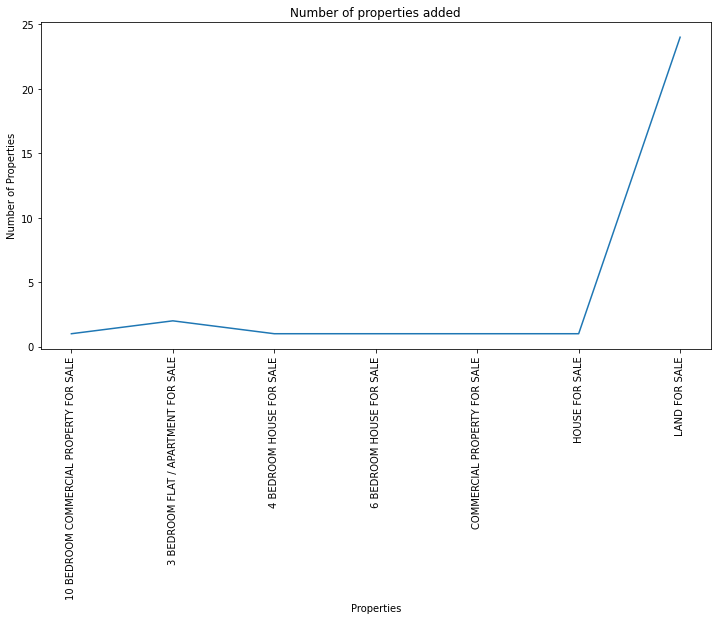

<Figure size 432x288 with 0 Axes>

In [23]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.lineplot(data = Date_property_added, ax = ax)
g.set(title = "Number of properties added",
     xlabel = "Properties", 
     ylabel = "Number of Properties")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

## How many properties were later updated?

To answer the question, I plotted the count of the properties against the date updated.

In [24]:
Date_property_updated = property_df4.groupby(['Nature_of_property'])['Date_updated'].count()

Date_property_updated

Nature_of_property
10 BEDROOM COMMERCIAL PROPERTY FOR SALE     0
3 BEDROOM FLAT / APARTMENT FOR SALE         2
4 BEDROOM HOUSE FOR SALE                    1
6 BEDROOM HOUSE FOR SALE                    0
COMMERCIAL PROPERTY FOR SALE                1
HOUSE FOR SALE                              1
LAND FOR SALE                              14
Name: Date_updated, dtype: int64

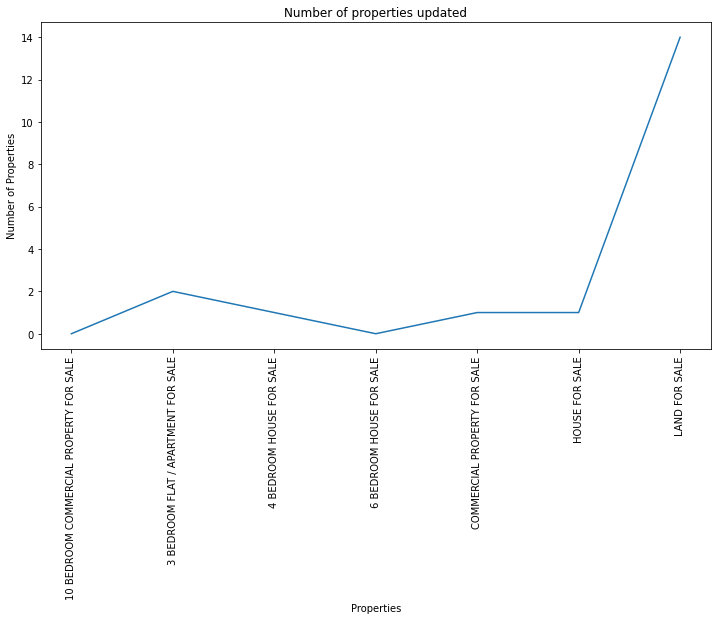

<Figure size 432x288 with 0 Axes>

In [25]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.lineplot(data = Date_property_updated, ax = ax)
g.set(title = "Number of properties updated",
     xlabel = "Properties", 
     ylabel = "Number of Properties")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

## Analysis of properties by their location

1. Which state has the highest number of properties in Nigeria?
2. In the predominant state, which specific location has the highest number of properties?
3. Which type of property has the highest number per state?

# 1.

In [26]:
# Creating list of states properties are located
State_Property_Located = []
for i in property_df4['Property_Location']:
    ans = i.split(" ")[-1]
    #print(ans)
    
    State_Property_Located.append(ans)
    
# I convert the list into a new column 'States_property_located' in the data
property_df4['State_Property_Located'] = State_Property_Located

C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\3825024795.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['State_Property_Located'] = State_Property_Located


<AxesSubplot:title={'center':'Property location by States'}>

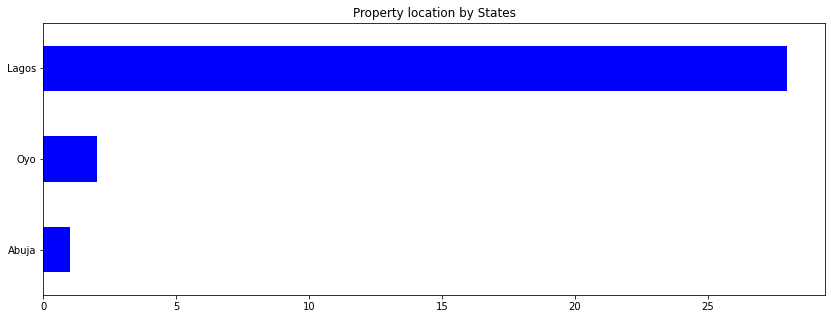

In [27]:
plt.figure(figsize = (14,5))
plt.title('Property location by States')
property_df4['State_Property_Located'].value_counts().sort_values().plot.barh(color = 'blue')

# 2.

In [28]:
# I create list of locations properties located in the predominant state

Property_location_in_pred_state = []
for i in property_df4['Property_Location']:
    if 'Lagos' in i:
        ans = i.rsplit('Lagos')[0]
    else:
        ans = None
    #print(ans)
    Property_location_in_pred_state.append(ans)

    
# I convert the list into a new column 'Property_location_in_pred_state'

property_df4['Property_location_in_pred_state'] = Property_location_in_pred_state

# I create another list with specific locations of properties in the predominant state, which is Lagos

Prop_location_in_pred_state = []
for i in property_df4['Property_location_in_pred_state']:
    if 'Lekki' in str(i):
        ans = 'Lekki'
    elif 'Ikoyi' in str(i):
        ans = 'Ikoyi'
    elif 'Victoria Island' in str(i):
        ans = 'Victoria Island'
    elif 'Amuwo Odofin' in str(i):
        ans = 'Amuwo Odofin'
    elif 'Apapa' in str(i):
        ans = 'Apapa'
    else:
        ans = i
    Prop_location_in_pred_state.append(ans)
    
# I convert the list into a new column 'Prop_location_in_Lagos'

property_df4['Prop_location_in_Lagos'] = Prop_location_in_pred_state

C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\997763077.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['Property_location_in_pred_state'] = Property_location_in_pred_state
C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\997763077.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['Prop_location_in_Lagos'] = Prop_location_in_pred_state


In [29]:
property_df4['Prop_location_in_Lagos']

0                  Lekki
1                  Lekki
2                  Lekki
3                  Lekki
4                  Lekki
5                  Lekki
6                  Lekki
7                  Ikoyi
8        Victoria Island
9         Ajangbadi Ojo 
10                 Lekki
21                 Lekki
22                  None
24          Ogudu Ogudu 
25                  None
29                  None
39                 Ikoyi
40                  Epe 
42            Sangotedo 
43                 Lekki
44                 Lekki
45                 Lekki
47                 Apapa
64     Bogije Sangotedo 
82           Abijo Ajah 
84                 Lekki
198         Amuwo Odofin
241                Lekki
287                Apapa
399                Lekki
485          Abijo Ajah 
Name: Prop_location_in_Lagos, dtype: object

<AxesSubplot:title={'center':'Property location in Lagos'}>

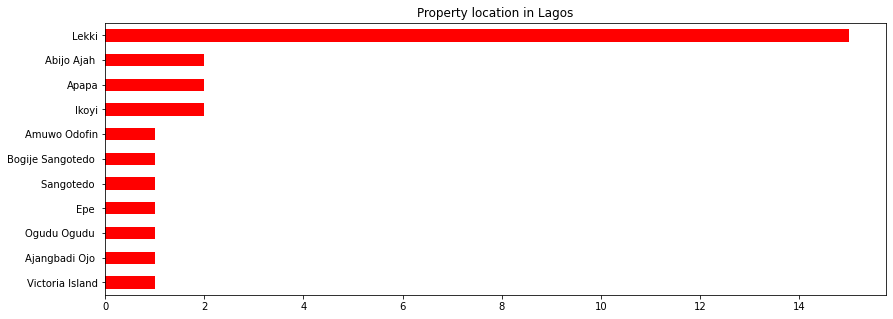

In [30]:
# Count of properties in different parts of Lagos

#%matplotlib notebook
plt.figure(figsize = (14,5))
plt.title('Property location in Lagos')
property_df4['Prop_location_in_Lagos'].value_counts().sort_values().plot.barh(color = 'red')

# 3

In [31]:
# I create a new list with the values on the column 'Type_of_property'

Property_Type = []

for i in property_df4['Type_of_property']:
    if 'Land' in i:
        ans = 'Land'
    elif 'School' in i:
        ans = i.split(" ")[2]
    elif 'Shop' in i:
        ans = 'Shop'
    elif 'Bedroom' in i:
        ans = "House"
    elif 'Beach' in i:
        ans = "House"
    
    Property_Type.append(ans)
    
# I convert the list into a new column 'Property_Type' 

property_df4['Property_Type'] = Property_Type

C:\Users\CHIDIEBERE NNAMANI\AppData\Local\Temp\ipykernel_2056\3985479348.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df4['Property_Type'] = Property_Type


In [32]:
PropertyType_State2 = property_df4.groupby(['State_Property_Located','Property_Type'])['Date_added'].count()

PropertyType_State2

State_Property_Located  Property_Type
Abuja                   School            1
Lagos                   House             6
                        Land             21
                        Shop              1
Oyo                     Land              2
Name: Date_added, dtype: int64

<IPython.core.display.Javascript object>


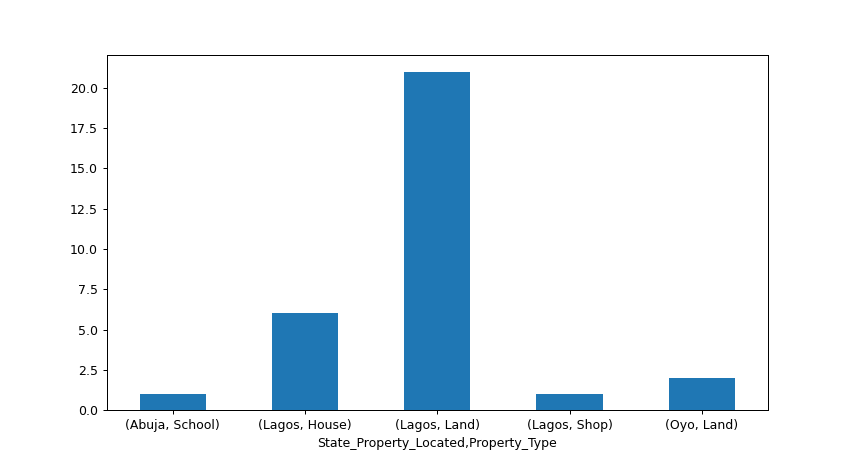

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '(Abuja, School)'),
  Text(1, 0, '(Lagos, House)'),
  Text(2, 0, '(Lagos, Land)'),
  Text(3, 0, '(Lagos, Shop)'),
  Text(4, 0, '(Oyo, Land)')])

In [46]:
%matplotlib notebook
plt.figure()
PropertyType_State = property_df4.groupby(['State_Property_Located','Property_Type'])['Date_added'].count().plot(kind = 'bar')
plt.xticks(rotation=0)

## Which property has the highest number of bathrooms, beds and toilets?

Grouping the nature of property by number of beds, bathrooms and toilets

In [34]:
beds = property_df4.groupby("Nature_of_property", as_index=False).agg({"No_of_beds":"sum"})
beds

,Nature_of_property,No_of_beds
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,10.0
1,3 BEDROOM FLAT / APARTMENT FOR SALE,6.0
2,4 BEDROOM HOUSE FOR SALE,4.0
3,6 BEDROOM HOUSE FOR SALE,6.0
4,COMMERCIAL PROPERTY FOR SALE,0.0
5,HOUSE FOR SALE,0.0
6,LAND FOR SALE,0.0


In [35]:
beds = beds.sort_values('No_of_beds', ascending = False).reset_index()

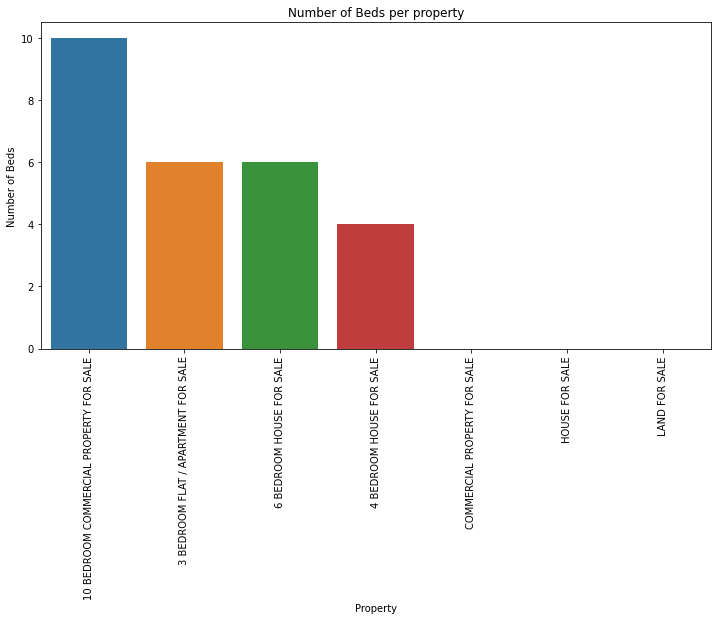

<Figure size 432x288 with 0 Axes>

In [37]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = beds, x = "Nature_of_property", y = "No_of_beds", ax = ax)
g.set(title = "Number of Beds per property",
     xlabel = "Property", 
     ylabel = "Number of Beds")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

In [38]:
baths = property_df4.groupby("Nature_of_property", as_index=False).agg({"No_of_baths":"sum"})
baths

,Nature_of_property,No_of_baths
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,10.0
1,3 BEDROOM FLAT / APARTMENT FOR SALE,6.0
2,4 BEDROOM HOUSE FOR SALE,4.0
3,6 BEDROOM HOUSE FOR SALE,7.0
4,COMMERCIAL PROPERTY FOR SALE,0.0
5,HOUSE FOR SALE,0.0
6,LAND FOR SALE,0.0


In [39]:
baths = baths.sort_values('No_of_baths', ascending = False).reset_index()

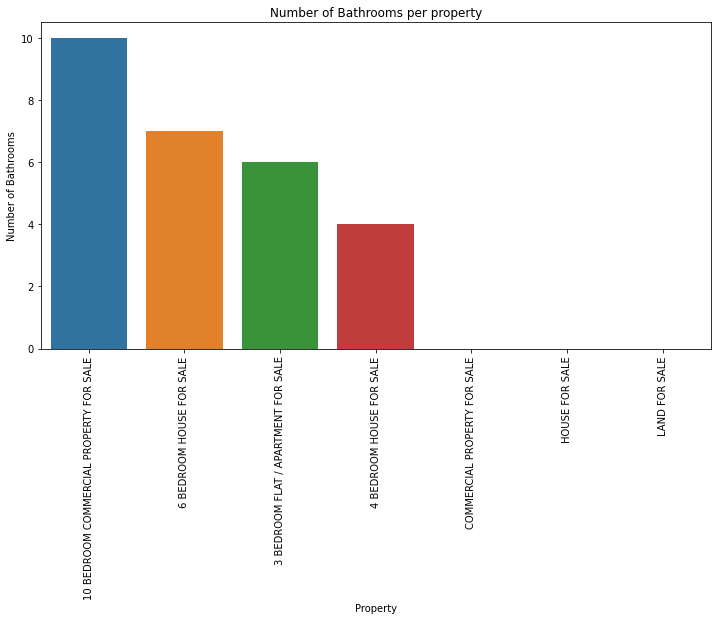

<Figure size 432x288 with 0 Axes>

In [40]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = baths, x = "Nature_of_property", y = "No_of_baths", ax = ax)
g.set(title = "Number of Bathrooms per property",
     xlabel = "Property", 
     ylabel = "Number of Bathrooms")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

In [41]:
toilets = property_df4.groupby("Nature_of_property", as_index=False).agg({"No_of_toilets":"sum"})
toilets

,Nature_of_property,No_of_toilets
0,10 BEDROOM COMMERCIAL PROPERTY FOR SALE,10.0
1,3 BEDROOM FLAT / APARTMENT FOR SALE,6.0
2,4 BEDROOM HOUSE FOR SALE,5.0
3,6 BEDROOM HOUSE FOR SALE,6.0
4,COMMERCIAL PROPERTY FOR SALE,0.0
5,HOUSE FOR SALE,0.0
6,LAND FOR SALE,0.0


In [42]:
toilets = property_df4.sort_values('No_of_toilets', ascending = False).reset_index()

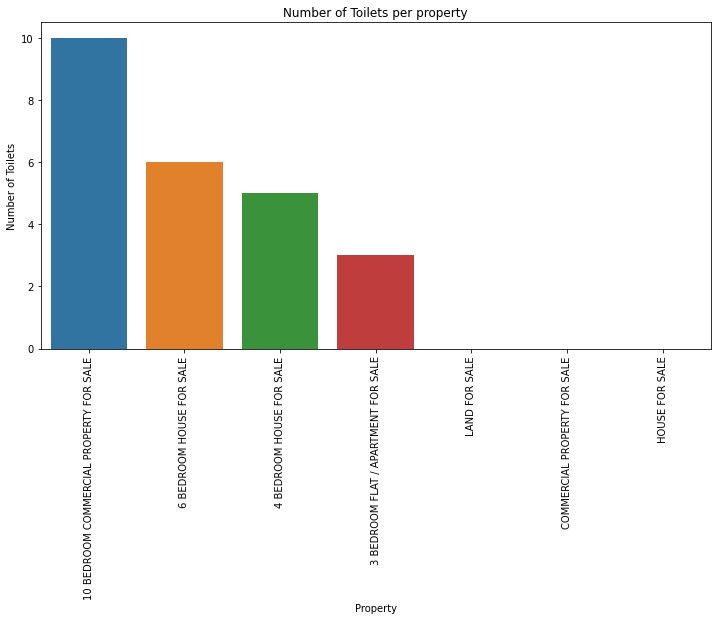

<Figure size 432x288 with 0 Axes>

In [43]:
fig, ax = plt.subplots(figsize= (12,6))
g = sns.barplot(data = toilets, x = "Nature_of_property", y = "No_of_toilets", ax = ax)
g.set(title = "Number of Toilets per property",
     xlabel = "Property", 
     ylabel = "Number of Toilets")
plt.xticks(rotation = 90)
plt.show()
plt.clf()

## Which State has the property with the highest number of beds, baths and toilets? i.e. the state having the 10 BEDROOM COMMERCIAL PROPERTY FOR SALE

To answer this, I group the state, number of beds, bathrooms and toilets by the nature of property

In [44]:
# To identify the state having property with the highest number of beds, baths and toilets

State_bed_baths_toilets = property_df4.groupby(['State_Property_Located','No_of_beds','No_of_baths','No_of_toilets']
                                              )['Nature_of_property'].count()

State_bed_baths_toilets

State_Property_Located  No_of_beds  No_of_baths  No_of_toilets
Abuja                   10.0        10.0         10.0              1
Lagos                   0.0         0.0          0.0              21
                        3.0         3.0          3.0               2
                        4.0         4.0          5.0               1
                        6.0         7.0          6.0               1
Oyo                     0.0         0.0          0.0               1
Name: Nature_of_property, dtype: int64

In [45]:
# Saving the data

property_df4.to_csv("New Property data.csv")